# By Kmeans Clusterring

In [1]:
# importing pandas
import pandas as pd

In [2]:
#reading the csv
A=pd.read_csv("Cars93.csv")

In [3]:
A[:5]

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [4]:
A.columns

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [5]:
#creating a new dataframe and scaling it with Standard scaler 
B=A[["Price","MPG.city","MPG.highway"]]
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
C=pd.DataFrame(ss.fit_transform(B),columns=["Price","Mileage_city","Mileage_highway"])

In [6]:
C

,Price,Mileage_city,Mileage_highway
0,-0.375720,0.471312,0.360925
1,1.497844,-0.781032,-0.770514
2,0.998227,-0.423219,-0.581941
3,1.893374,-0.602126,-0.581941
4,1.091905,-0.065407,0.172352
...,...,...,...
88,0.019810,-0.959938,-1.524806
89,0.051036,-0.244313,0.172352
90,0.394523,-0.781032,-0.770514
91,0.332071,-0.244313,-0.204794


In [7]:
#importing Kmeans and fitting it
from sklearn.cluster import KMeans
km=KMeans(n_clusters=4)
model=km.fit(C)

In [8]:
model.cluster_centers_

array([[ 1.70111969, -0.7178887 , -0.67068092],
       [-0.75453338,  0.70443291,  0.73235671],
       [-0.02390641, -0.54398118, -0.56308333],
       [-1.02105893,  3.57235628,  3.25237902]])

In [9]:
model.labels_

array([1, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 3, 1, 1, 3, 1, 1,
       1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 2, 2, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 2, 3, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 2])

In [10]:
C['clustering_vector']=model.labels_

In [11]:
C

,Price,Mileage_city,Mileage_highway,clustering_vector
0,-0.375720,0.471312,0.360925,1
1,1.497844,-0.781032,-0.770514,0
2,0.998227,-0.423219,-0.581941,0
3,1.893374,-0.602126,-0.581941,0
4,1.091905,-0.065407,0.172352,0
...,...,...,...,...
88,0.019810,-0.959938,-1.524806,2
89,0.051036,-0.244313,0.172352,2
90,0.394523,-0.781032,-0.770514,2
91,0.332071,-0.244313,-0.204794,2


In [12]:
Q = pd.DataFrame(model.cluster_centers_,columns=["c1","c2","c3"])
Q

,c1,c2,c3
0,1.701120,-0.717889,-0.670681
1,-0.754533,0.704433,0.732357
2,-0.023906,-0.543981,-0.563083
3,-1.021059,3.572356,3.252379


In [13]:
import matplotlib.pyplot as plt
plt.scatter(C.Price,C.Mileage_city,C.Mileage_highway,c=C.clustering_vector)

C:\Users\joshi\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


In [14]:
K = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
WCSS = []
for i in K:
   from sklearn.cluster import KMeans
   km = KMeans(n_clusters=i)
   model = km.fit(C)
   WCSS.append(model.inertia_)
#model.inertia_

Text(0.5, 1.0, 'Elbow curve')

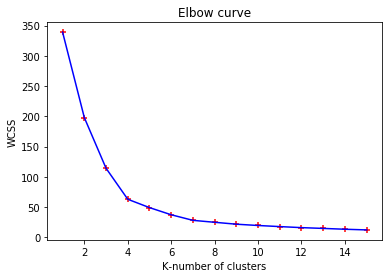

In [15]:
#plotting the results
plt.scatter(K,WCSS,c="red",marker="+")
plt.plot(K,WCSS,c="blue")
plt.xlabel("K-number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow curve")


# Agglomerative or Hierarchical Clustering

In [16]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=5)
model = agc.fit(C)
B['Cluster']=model.labels_
B

C:\Users\joshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Price,MPG.city,MPG.highway,Cluster
0,15.9,25,31,4
1,33.9,18,25,2
2,29.1,20,26,2
3,37.7,19,26,2
4,30.0,22,30,2
...,...,...,...,...
88,19.7,17,21,0
89,20.0,21,30,0
90,23.3,18,25,0
91,22.7,21,28,0


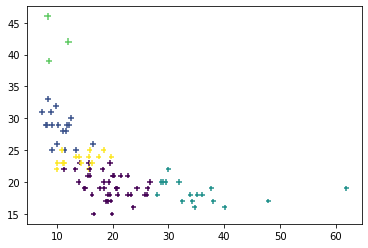

In [17]:
import matplotlib.pyplot as plt
plt.scatter(B['Price'],B['MPG.city'],B['MPG.highway'],c=B.Cluster,marker="+")

C:\Users\joshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


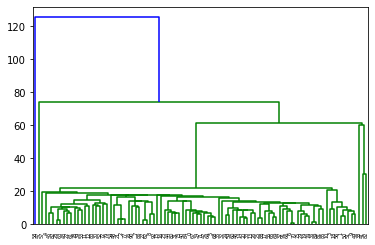

In [18]:
#importing relevant libraries and plotting the results
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial import distance_matrix
C = pd.DataFrame(distance_matrix(B.values, B.values), index=B.index, columns=B.index)
dist_mat = C
linkage_matrix = linkage(dist_mat)
dendrogram(linkage_matrix)
plt.show()

In [19]:
C

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,0.000000,20.322401,15.107614,23.243063,14.588009,3.006659,9.220087,13.922643,13.272528,21.781644,...,11.454693,2.692582,5.855766,13.865064,7.696753,13.944174,7.057620,12.480385,9.340236,12.908912
1,20.322401,0.000000,5.295281,4.054627,7.497333,19.678415,13.623876,10.584895,8.170679,2.154066,...,30.361324,18.500000,16.807439,11.766053,27.000741,14.921126,15.205591,10.787029,12.142487,8.296987
2,15.107614,5.295281,0.000000,8.657944,4.561798,14.579438,8.825531,7.082372,3.720215,6.954135,...,25.268360,13.397388,11.653755,8.059777,21.794495,11.240996,10.188719,6.529931,7.068239,3.709447
3,23.243063,4.054627,8.657944,0.000000,9.180959,22.847319,17.135052,14.491377,11.617229,4.358899,...,32.701835,21.177582,20.056171,15.684387,30.065928,18.894444,18.365457,14.606848,15.394804,11.401754
4,14.588009,7.497333,4.561798,9.180959,0.000000,14.473769,10.081667,10.231813,5.974111,9.115372,...,23.622870,12.310971,12.009996,11.717082,21.349707,14.700000,10.246951,9.481034,7.892401,4.784349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,13.944174,14.921126,11.240996,18.894444,14.700000,12.529964,7.362744,5.744563,9.141116,15.684387,...,24.083397,14.236924,9.552487,3.316625,17.926517,0.000000,9.853426,5.473573,8.602325,10.344080
89,7.057620,15.205591,10.188719,18.365457,10.246951,6.040695,2.939388,7.980601,7.258788,16.434415,...,16.584330,6.209670,2.289105,8.960469,12.033703,9.853426,0.000000,6.700000,3.360060,7.063285
90,12.480385,10.787029,6.529931,14.606848,9.481034,11.214277,4.031129,2.039608,3.741657,11.745637,...,22.874658,11.747766,7.616430,3.059412,17.766260,5.473573,6.700000,0.000000,4.284857,4.955805
91,9.340236,12.142487,7.068239,15.394804,7.892401,8.660254,2.758623,5.916080,4.237924,13.490738,...,19.220042,8.154140,4.716991,6.708204,15.065192,8.602325,3.360060,4.284857,0.000000,4.123106
